In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

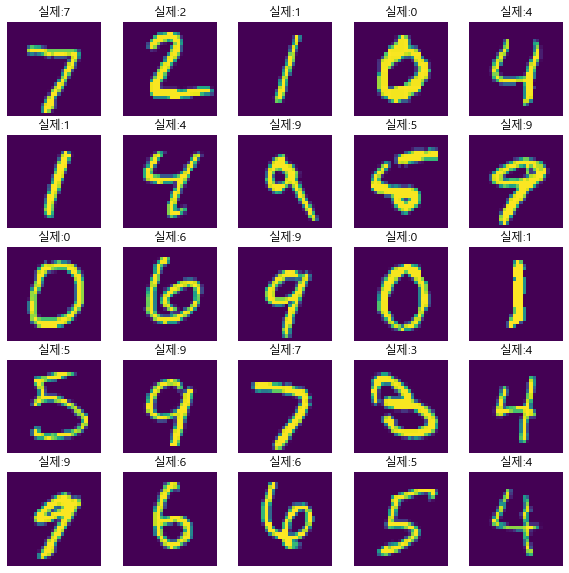

In [4]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제:"+str(np.argmax(y_test[i])))

# 1. DNN(다중 퍼셉트론)

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3957 - accuracy: 0.8783 - val_loss: 0.1192 - val_accuracy: 0.9628
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1008 - accuracy: 0.9679 - val_loss: 0.1088 - val_accuracy: 0.9682
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9786 - val_loss: 0.1008 - val_accuracy: 0.9705
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 0.0922 - val_accuracy: 0.9746
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0845 - val_accuracy: 0.9775
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.1003 - val_accuracy: 0.9776
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.1289 - val_accuracy:

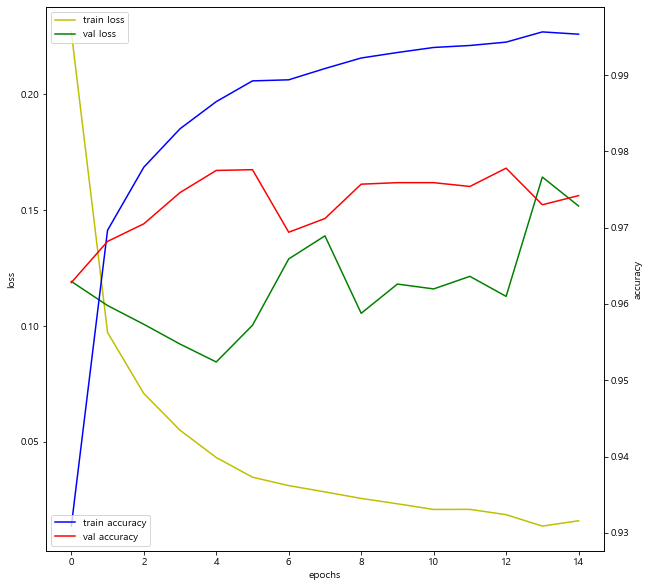

313/313 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9748


loss: 0.1477695107460022 ,metrics["accuracy"]: 0.9747999906539917


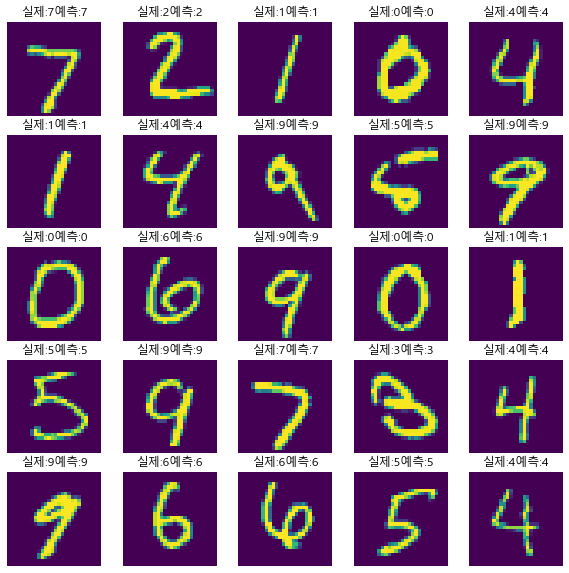

In [5]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)

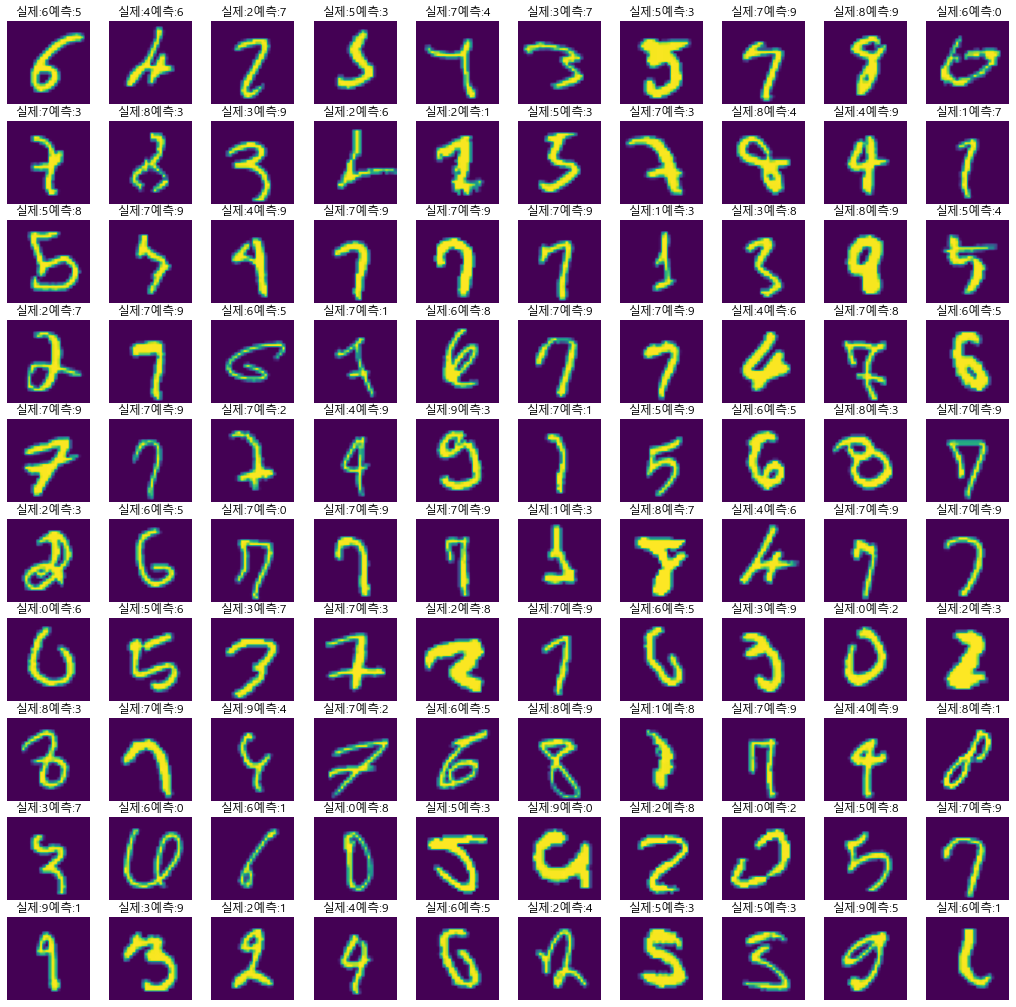

In [6]:
# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

# 2. CNN(컨볼루션 레이어 -> 깊은 컨볼루션 레이어)

Epoch 1/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3246 - accuracy: 0.9023 - val_loss: 0.0515 - val_accuracy: 0.9849
Epoch 2/30
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0549 - val_accuracy: 0.9841
Epoch 3/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0440 - val_accuracy: 0.9877
Epoch 4/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0356 - val_accuracy: 0.9896
Epoch 5/30
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 6/30
1563/1563 [==============================] - 23s 14ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0492 - val_accuracy: 0.9877
Epoch 7/30
1563/1563 [==============================] - 24s 15ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0423 -

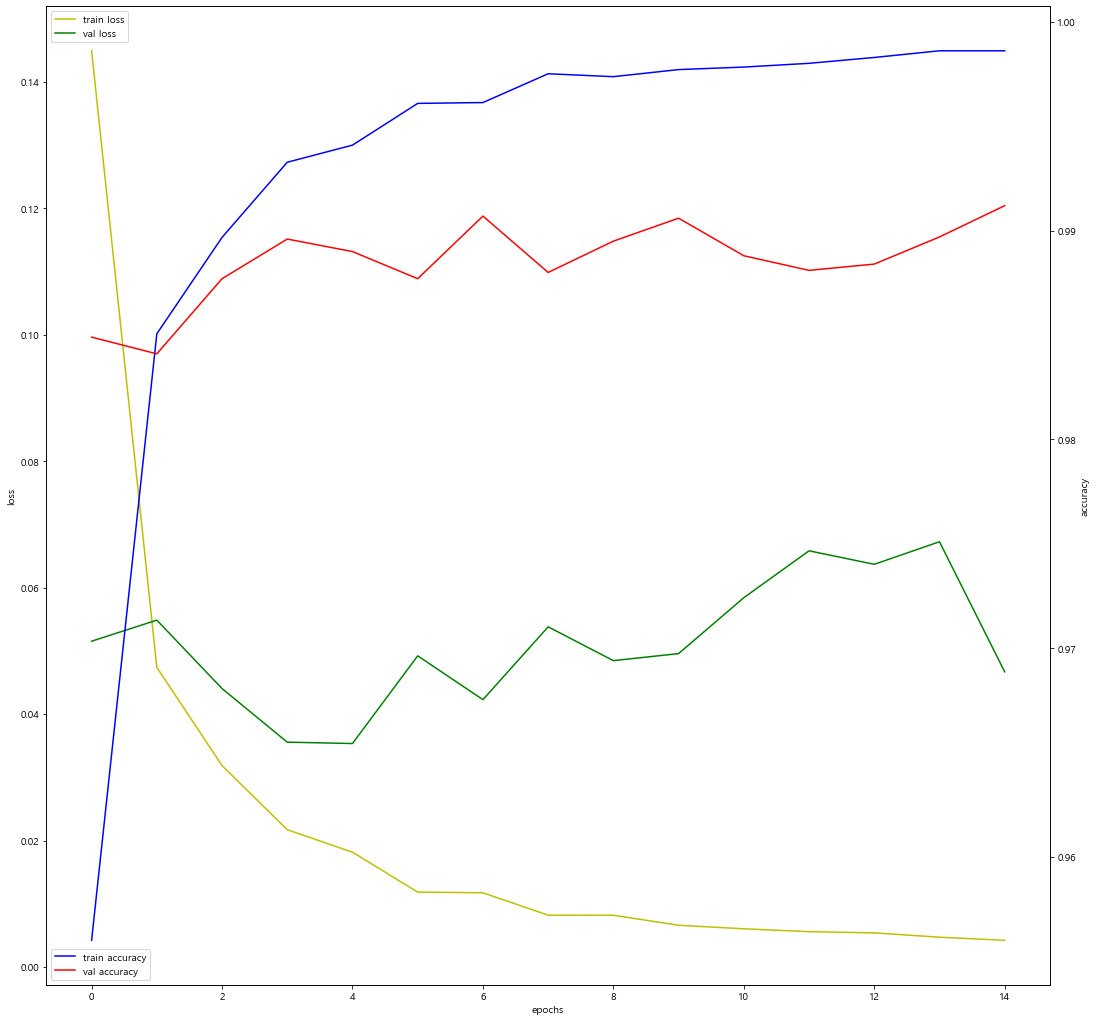

313/313 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9913


loss: 0.045429788529872894 ,metrics["accuracy"]: 0.9912999868392944


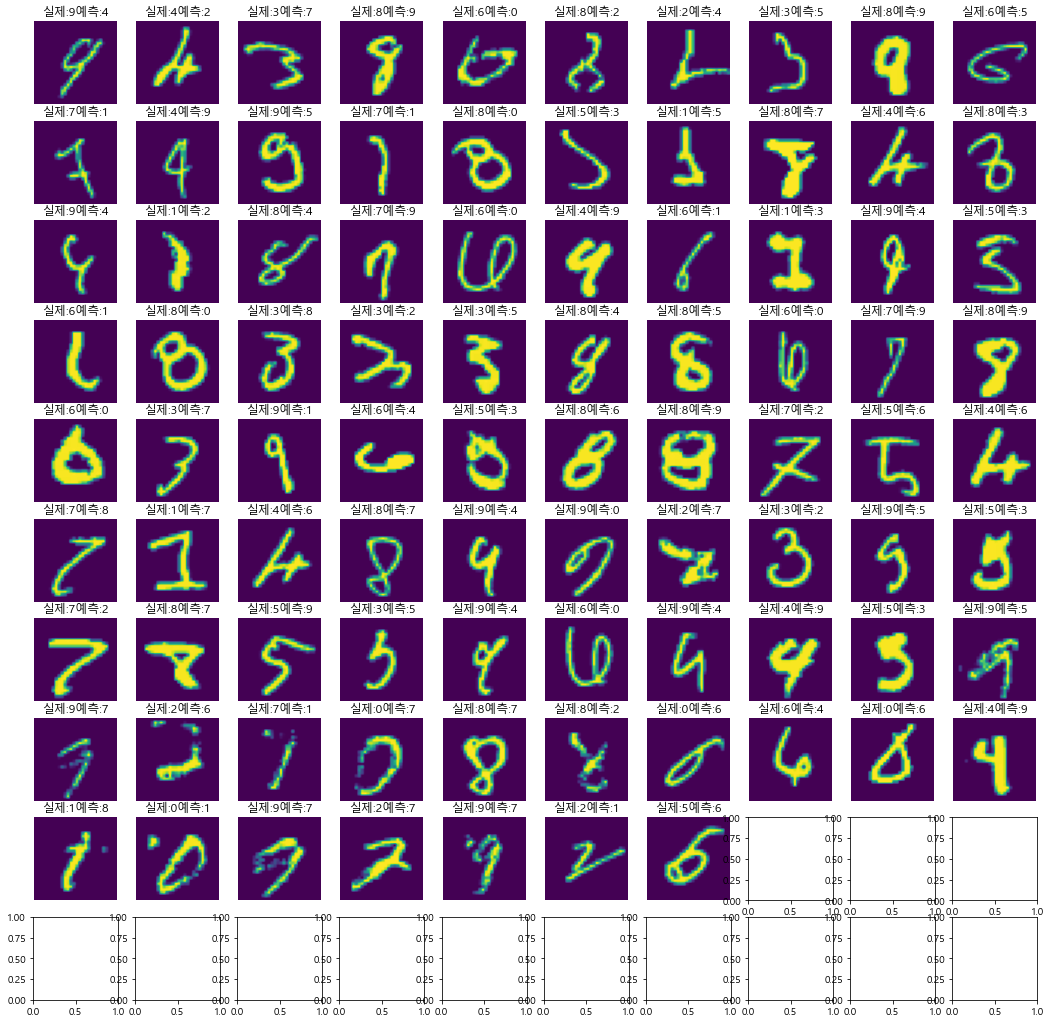

In [7]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

Epoch 1/30
1563/1563 [==============================] - 87s 55ms/step - loss: 0.3530 - accuracy: 0.8828 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 2/30
1563/1563 [==============================] - 82s 53ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0365 - val_accuracy: 0.9880
Epoch 3/30
1563/1563 [==============================] - 84s 54ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 4/30
1563/1563 [==============================] - 74s 47ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0301 - val_accuracy: 0.9915
Epoch 5/30
1563/1563 [==============================] - 76s 48ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0354 - val_accuracy: 0.9910
Epoch 6/30
1563/1563 [==============================] - 74s 47ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0336 - val_accuracy: 0.9921
Epoch 7/30
1563/1563 [==============================] - 73s 47ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0295 -

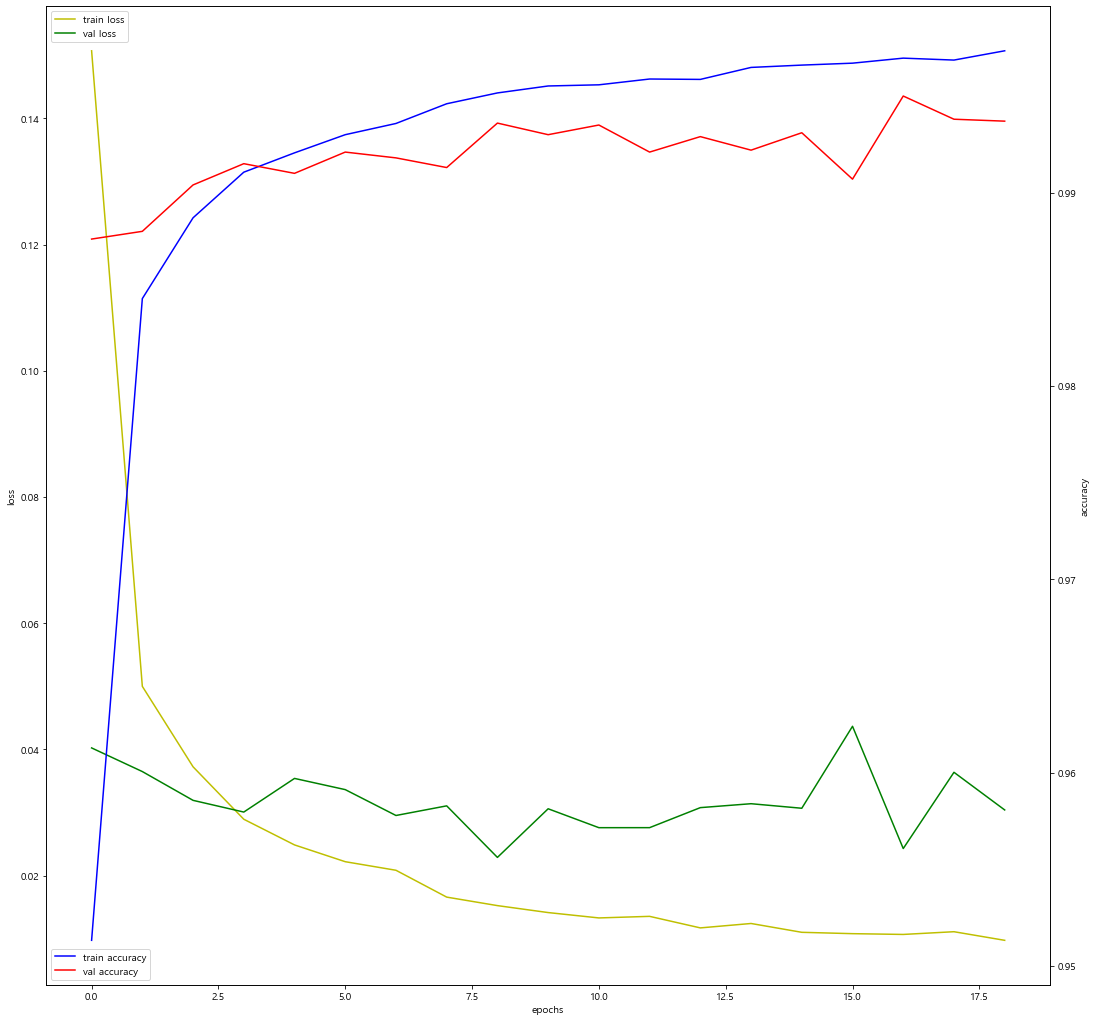

313/313 [==============================] - 3s 8ms/step - loss: 0.0264 - accuracy: 0.9935


loss: 0.026418188586831093 ,metrics["accuracy"]: 0.9934999942779541


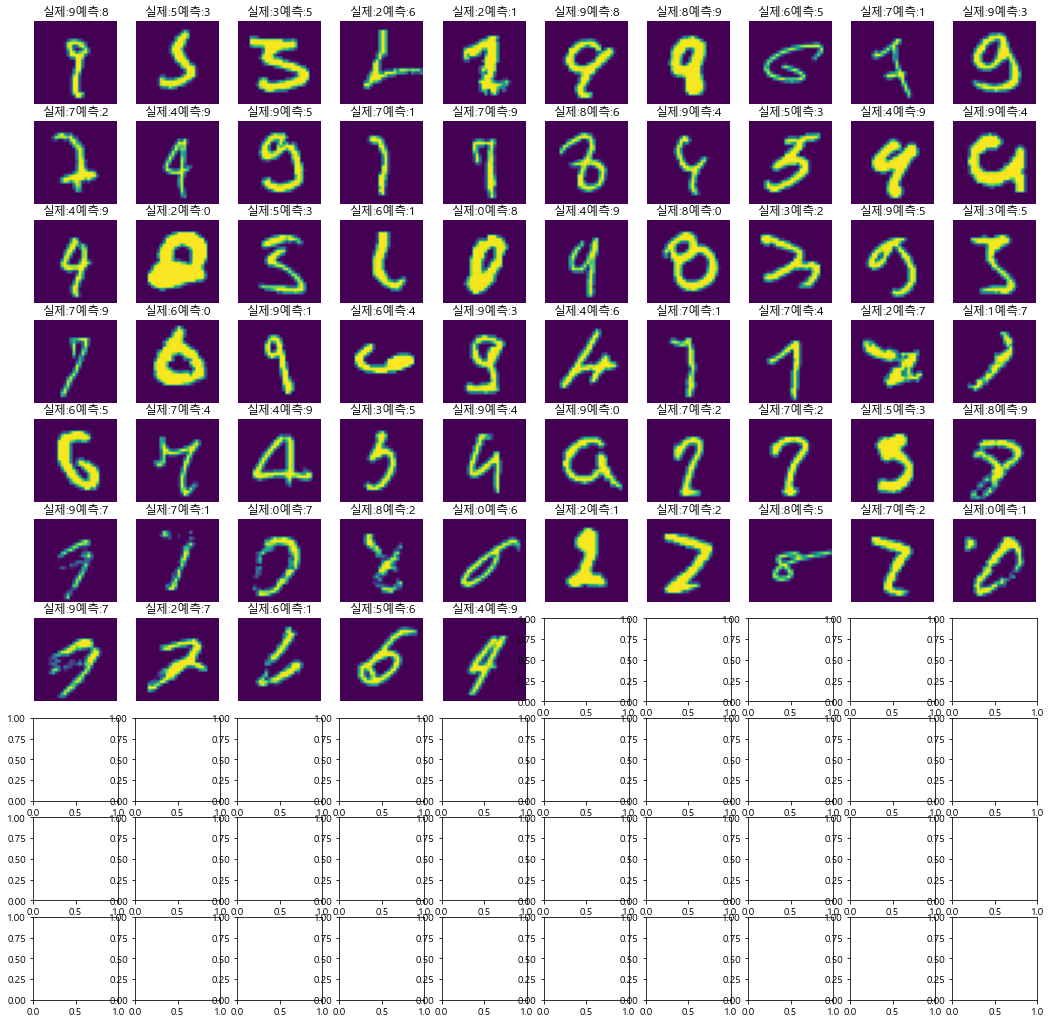

In [8]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1